In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
import cv2
import random

In [2]:
#參數設定
M = 3
s = 0.6
N = np.array([5,10,30,80]) 
beta = 1
S0_inv = (10 ** -6)*np.eye(M)  #3x3

In [3]:
#寫入資料
x_data = []
t_data = []
x = []
t = []
with open('data.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
    rows = csv.reader(csvfile)
  # 以迴圈輸出每一列
    for row in rows :
        x_data.append(row[0])
        t_data.append(row[1])
        #print(row)
for i in range(1,len(x_data)):
    x.append(float(x_data[i]))
    t.append(float(t_data[i]))
x = np.array(x)   #1x100
t = np.array(t)
#print(x)
#print(t)

In [4]:
#Sigmoid function:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [5]:
# Construct phi_matrix 
p_matrix = []
mn_store = []
sn_store = []
mn_temp = []
sn_temp = []
for i in range(0,len(x)):
    p_temp = []
    p_temp.append(sigmoid(x[i]/s))
    p_temp.append(sigmoid((x[i]-2/3)/s))
    p_temp.append(sigmoid((x[i]-4/3)/s))
    p_matrix.append(np.array(p_temp).reshape((1,3)))
#print(p_matrix)


#先做出m1 s1
s0 = np.linalg.inv(S0_inv)
#print(p_matrix[0].T.shape)
s1_inv = S0_inv + beta*np.dot(p_matrix[0].T,p_matrix[0])
s1 = np.linalg.inv(s1_inv)
#print(s0)
m1 = beta*np.dot(s1,p_matrix[0].T)*t[0]
mn_temp.append(m1)
sn_temp.append(s1)
#print(m1)
#print(s1)

#N = 5
for n in range(1,N[0]):
    a = np.linalg.inv(sn_temp[n-1])
    sn_inv = a + beta*np.dot(p_matrix[n].T,p_matrix[n])
    sn = np.linalg.inv(sn_inv)
    sn_temp.append(sn)
    b = np.dot(a,mn_temp[n-1]) + beta*p_matrix[n].T*t[n]
    m_n = np.dot(sn,b)
    mn_temp.append(m_n)
    
mn_store.append(m_n)
sn_store.append(sn)
print('N=5 時：')
print('m_5 = ',m_n)
print('s_5 = ',sn)
#print(mn_store)
#N = 10
for n in range(1,N[1]):
    a = np.linalg.inv(sn_temp[n-1])
    sn_inv = a + beta*np.dot(p_matrix[n].T,p_matrix[n])
    sn = np.linalg.inv(sn_inv)
    sn_temp.append(sn)
    b = np.dot(a,mn_temp[n-1]) + beta*p_matrix[n].T*t[n]
    m_n = np.dot(sn,b)
    mn_temp.append(m_n)
    
mn_store.append(m_n)
sn_store.append(sn)
print('N=10 時：')
print('m_10 = ',m_n)
print('s_10 = ',sn)

#N = 30
for n in range(1,N[2]):
    a = np.linalg.inv(sn_temp[n-1])
    sn_inv = a + beta*np.dot(p_matrix[n].T,p_matrix[n])
    sn = np.linalg.inv(sn_inv)
    sn_temp.append(sn)
    b = np.dot(a,mn_temp[n-1]) + beta*p_matrix[n].T*t[n]
    m_n = np.dot(sn,b)
    mn_temp.append(m_n)
    
mn_store.append(m_n)
sn_store.append(sn)
print('N=30 時：')
print('m_30 = ',m_n)
print('s_30 = ',sn)


#N = 80
for n in range(1,N[3]):
    a = np.linalg.inv(sn_temp[n-1])
    sn_inv = a + beta*np.dot(p_matrix[n].T,p_matrix[n])
    sn = np.linalg.inv(sn_inv)
    sn_temp.append(sn)
    b = np.dot(a,mn_temp[n-1]) + beta*p_matrix[n].T*t[n]
    m_n = np.dot(sn,b)
    mn_temp.append(m_n)
    
mn_store.append(m_n)
sn_store.append(sn)
print('N=80 時：')
print('m_80 = ',m_n)
print('s_80 = ',sn)

N=5 時：
m_5 =  [[ 15.3918259 ]
 [-27.24893207]
 [ 13.76463907]]
s_5 =  [[ 269.04934203 -577.62671302  361.07317844]
 [-577.62671302 1261.47181151 -803.66739993]
 [ 361.07317844 -803.66739993  523.15065575]]
N=10 時：
m_10 =  [[ 15.02307702]
 [-26.42568831]
 [ 13.24703201]]
s_10 =  [[ 235.2230813  -502.10849412  313.59178161]
 [-502.10849412 1092.87495029 -697.66364893]
 [ 313.59178161 -697.66364893  456.50175644]]
N=30 時：
m_30 =  [[ 16.74748058]
 [-30.75338286]
 [ 16.48689475]]
s_30 =  [[  332.87194836  -730.56685746   481.87894563]
 [ -730.56685746  1626.04940581 -1091.7178122 ]
 [  481.87894563 -1091.7178122    750.32041508]]
N=80 時：
m_80 =  [[ 18.51346639]
 [-33.60090081]
 [ 17.60653214]]
s_80 =  [[  94.94549959 -231.3166393   166.54797427]
 [-231.3166393   576.181801   -423.33205451]
 [ 166.54797427 -423.33205451  317.13695932]]


In [6]:
a5 = np.random.multivariate_normal(mn_store[0].flatten(),sn_store[0],5)
a10 = np.random.multivariate_normal(mn_store[1].flatten(),sn_store[1],5)
a30 = np.random.multivariate_normal(mn_store[2].flatten(),sn_store[2],5)
a80 = np.random.multivariate_normal(mn_store[3].flatten(),sn_store[3],5)


red = np.linspace(0, 2, 100)

#把red丟進p matrix
r_matrix = []
for i in red:
    r_temp = []
    r_temp.append(sigmoid(i/s))
    r_temp.append(sigmoid((i-2/3)/s))
    r_temp.append(sigmoid((i-4/3)/s))
    r_matrix.append(np.array(r_temp).reshape((1,3)))
#print(r_matrix[0])
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
for i in r_matrix:
    temp_line = np.dot(i,a5.T)
    for j in temp_line:
        y1.append(j[0])
        y2.append(j[1])
        y3.append(j[2])
        y4.append(j[3])
        y5.append(j[4])
for i in r_matrix:
    temp_line = np.dot(i,a10.T)
    for j in temp_line:
        y1.append(j[0])
        y2.append(j[1])
        y3.append(j[2])
        y4.append(j[3])
        y5.append(j[4])   
for i in r_matrix:
    temp_line = np.dot(i,a30.T)
    for j in temp_line:
        y1.append(j[0])
        y2.append(j[1])
        y3.append(j[2])
        y4.append(j[3])
        y5.append(j[4])  
for i in r_matrix:
    temp_line = np.dot(i,a80.T)
    for j in temp_line:
        y1.append(j[0])
        y2.append(j[1])
        y3.append(j[2])
        y4.append(j[3])
        y5.append(j[4])  

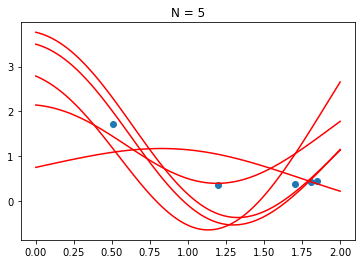

In [7]:
#1-1
#N = 5
plt.scatter(x[0:5],t[0:5])
plt.title('N = 5')
plt.plot(red,y1[0:100],'red')
plt.plot(red,y2[0:100],'red')
plt.plot(red,y3[0:100],'red')
plt.plot(red,y4[0:100],'red')
plt.plot(red,y5[0:100],'red')

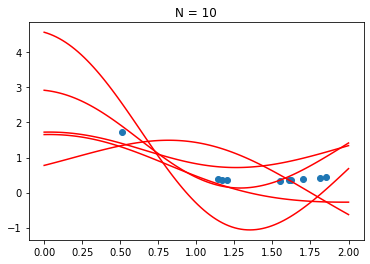

In [8]:
#N = 10
plt.scatter(x[0:10],t[0:10])
plt.title('N = 10')
plt.plot(red,y1[100:200],'red')
plt.plot(red,y2[100:200],'red')
plt.plot(red,y3[100:200],'red')
plt.plot(red,y4[100:200],'red')
plt.plot(red,y5[100:200],'red')

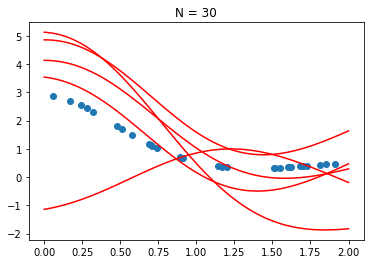

In [9]:
#N = 30
plt.scatter(x[0:30],t[0:30])
plt.title('N = 30')
plt.plot(red,y1[200:300],'red')
plt.plot(red,y2[200:300],'red')
plt.plot(red,y3[200:300],'red')
plt.plot(red,y4[200:300],'red')
plt.plot(red,y5[200:300],'red')

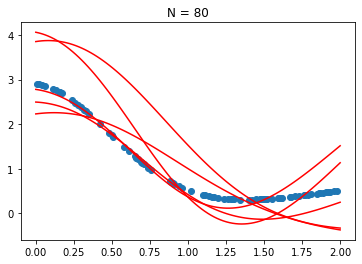

In [10]:
#N = 80
plt.scatter(x[0:80],t[0:80])
plt.title('N = 80')
plt.plot(red,y1[300:400],'red')
plt.plot(red,y2[300:400],'red')
plt.plot(red,y3[300:400],'red')
plt.plot(red,y4[300:400],'red')
plt.plot(red,y5[300:400],'red')

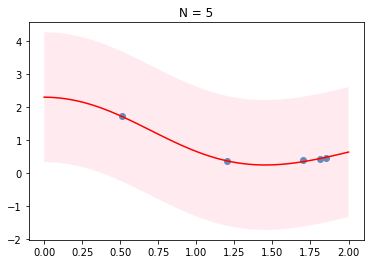

In [11]:
#1-2
#算var
#N = 5
var_temp = []
tt = np.dot(r_matrix[0],s0)
v0 = 1+np.dot(tt,r_matrix[0].T)
var_temp.append(v0)
#print(v0)
for i in range(1,N[3]):
    tt = np.dot(r_matrix[i],sn_temp[i-1])
    v = 1 + np.dot(tt,r_matrix[i].T)
    var_temp.append(v)
#print(var_temp[79])
yn5 = np.dot(np.array(r_matrix),np.array(mn_store[0]))
yn10 = np.dot(np.array(r_matrix),np.array(mn_store[1]))
yn30 = np.dot(np.array(r_matrix),np.array(mn_store[2]))
yn80 = np.dot(np.array(r_matrix),np.array(mn_store[3]))


lowbound5 = yn5 - math.sqrt(var_temp[N[0]-1])
upbound5 = yn5 + math.sqrt(var_temp[N[0]-1])


plt.scatter(x[0:N[0]],t[0:N[0]])
plt.title('N = 5')
plt.plot(red,yn5.flatten(),'red')
plt.fill_between(red, lowbound5.flatten(), upbound5.flatten(), facecolor='pink', alpha=0.3)

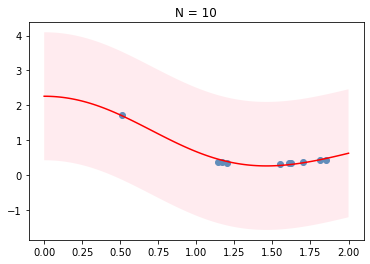

In [12]:
#N = 10 
lowbound10 = yn10 - math.sqrt(var_temp[N[1]-1])
upbound10 = yn10 + math.sqrt(var_temp[N[1]-1])


plt.scatter(x[0:N[1]],t[0:N[1]])
plt.title('N = 10')
plt.plot(red,yn10.flatten(),'red')
plt.fill_between(red, lowbound10.flatten(), upbound10.flatten(), facecolor='pink', alpha=0.3)

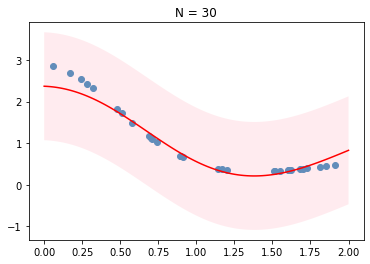

In [13]:
#N = 30 
lowbound30 = yn30 - math.sqrt(var_temp[N[2]-1])
upbound30 = yn30 + math.sqrt(var_temp[N[2]-1])


plt.scatter(x[0:N[2]],t[0:N[2]])
plt.title('N = 30')
plt.plot(red,yn30.flatten(),'red')
plt.fill_between(red, lowbound30.flatten(), upbound30.flatten(), facecolor='pink', alpha=0.3)

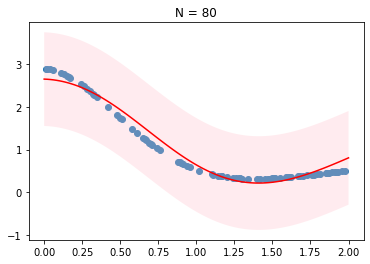

In [14]:
#N = 80 
lowbound80 = yn80 - math.sqrt(var_temp[N[3]-1])
upbound80 = yn80 + math.sqrt(var_temp[N[3]-1])


plt.scatter(x[0:N[3]],t[0:N[3]])
plt.title('N = 80')
plt.plot(red,yn80.flatten(),'red')
plt.fill_between(red, lowbound80.flatten(), upbound80.flatten(), facecolor='pink', alpha=0.3)

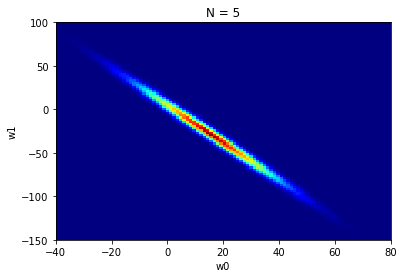

In [15]:
#1-3
#N = 5
w5 = np.random.multivariate_normal(mn_store[0].flatten(),sn_store[0],500000)
w5 = np.array(w5)
x = w5[:,0] #w0
y = w5[:,1] #w1
plt.xlabel("w0")
plt.ylabel("w1")
plt.title('N = 5')
plt.hist2d(x,y,bins=[100,100],range=np.array([(-40,80),(-150,100)]),cmap=plt.cm.jet)
plt.show()

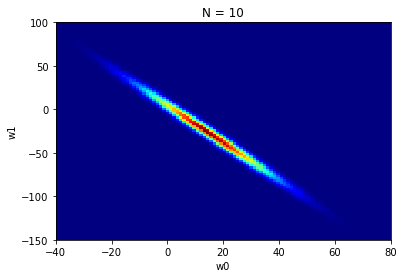

In [16]:
#N = 10
w10 = np.random.multivariate_normal(mn_store[1].flatten(),sn_store[1],500000)
w10 = np.array(w10)
x = w10[:,0] #w0
y = w10[:,1] #w1
plt.xlabel("w0")
plt.ylabel("w1")
plt.title('N = 10')
plt.hist2d(x,y,bins=[100,100],range=np.array([(-40,80),(-150,100)]),cmap=plt.cm.jet)
plt.show()

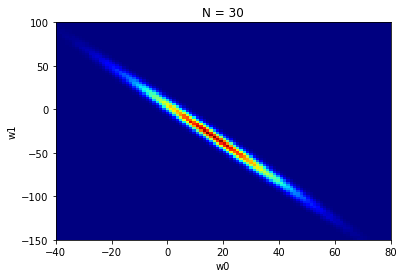

In [17]:
#N = 30
w30 = np.random.multivariate_normal(mn_store[2].flatten(),sn_store[2],500000)
w30 = np.array(w30)
x = w30[:,0] #w0
y = w30[:,1] #w1
plt.xlabel("w0")
plt.ylabel("w1")
plt.title('N = 30')
plt.hist2d(x,y,bins=[100,100],range=np.array([(-40,80),(-150,100)]),cmap=plt.cm.jet)
plt.show()

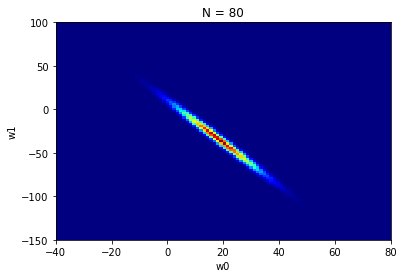

In [18]:
#N = 80
w80 = np.random.multivariate_normal(mn_store[3].flatten(),sn_store[3],500000)
w80 = np.array(w80)
x = w80[:,0] #w0
y = w80[:,1] #w1
plt.xlabel("w0")
plt.ylabel("w1")
plt.title('N = 80')
plt.hist2d(x,y,bins=[100,100],range=np.array([(-40,80),(-150,100)]),cmap=plt.cm.jet)
plt.show()

In [19]:
#1-4 討論！

In [36]:
#2
# load
img0 = []
img1 = []
img2 = []
img3 = []
img4 = []

for i in range(0,64):
    img = cv2.imread('./Fashion_MNIST/0/{file}.png'.format(file = i), cv2.IMREAD_GRAYSCALE) 
    img0.append(img)
for i in range(0,64):
    img = cv2.imread('./Fashion_MNIST/1/{file}.png'.format(file = i), cv2.IMREAD_GRAYSCALE) 
    img1.append(img)
for i in range(0,64):
    img = cv2.imread('./Fashion_MNIST/2/{file}.png'.format(file = i), cv2.IMREAD_GRAYSCALE) 
    img2.append(img)
for i in range(0,64):
    img = cv2.imread('./Fashion_MNIST/3/{file}.png'.format(file = i), cv2.IMREAD_GRAYSCALE) 
    img3.append(img)
for i in range(0,64):
    img = cv2.imread('./Fashion_MNIST/4/{file}.png'.format(file = i), cv2.IMREAD_GRAYSCALE) 
    img4.append(img)
#print((img4))

In [405]:
#參數設定
lr = 0.0003

In [418]:
#split training data to testing data
img0_test = []
img1_test = []
img2_test = []
img3_test = []
img4_test = []

img0_train = []
img1_train = []
img2_train = []
img3_train = []
img4_train = []

random.shuffle(img0)
random.shuffle(img1)
random.shuffle(img2)
random.shuffle(img3)
random.shuffle(img4)
for i in range(0,len(img0)-32):
    img0_test.append(img0[i])
for j in range(32,64):
    img0_train.append(img0[j])
#print((img0_test))

for i in range(0,len(img1)-32):
    img1_test.append(img1[i])
for j in range(32,64):
    img1_train.append(img1[j])
    
for i in range(0,len(img2)-32):
    img2_test.append(img2[i])
for j in range(32,64):
    img2_train.append(img2[j])
    
for i in range(0,len(img3)-32):
    img3_test.append(img3[i])
for j in range(32,64):
    img3_train.append(img3[j])
    
for i in range(0,len(img4)-32):
    img4_test.append(img4[i])
for j in range(32,64):
    img4_train.append(img4[j])

In [419]:
#multi-class-classification model

In [420]:
#softmax model
def softmax(z,exp_sum_of_z):
    for i in z:
        temp_z = []
        temp_z.append(math.exp(i)/exp_sum_of_z) 
    temp_z = np.array(temp_z)
    return temp_z

In [421]:
#cross-entropy
cross_entropy_store = [] #五個全存裡面
#cross_entropy_sum = cross_entropy_store[-5]+cross_entropy_store[-4]+cross_entropy_store[-3]+cross_entropy_store[-2]+cross_entropy_store[-1]
def cross_entropy(y_head, target):
    #print(y_head)
    if y_head != 0:
        loss = -(math.log(y_head))*target
        cross_entropy_store.append(loss)
    else:
        cross_entropy_store.append(1)

In [422]:
#update weight
w0 = []
w1 = []
w2 = []
w3 = []
w4 = []
def update_weight(weight,target,y_head,x,class_num):
    w_update = weight + lr *(target - y_head)*x
    if class_num == 0:
        w0.append(w_update)
    elif class_num == 1:
        w1.append(w_update)
    elif class_num == 2:
        w2.append(w_update)
    elif class_num == 3:
        w3.append(w_update)
    elif class_num == 4:
        w4.append(w_update)

In [423]:
#生成z
z0 = []
z1 = []
z2 = []
z3 = []
z4 = []
def generate_z(weight,x,class_num):
    z = np.dot(weight,x)
    #print(z)
    if class_num == 0:
        z0.append(z)
    elif class_num == 1:
        z1.append(z)
    elif class_num == 2:
        z2.append(z)
    elif class_num == 3:
        z3.append(z)
    elif class_num == 4:
        z4.append(z)

In [424]:
def intital_weight():
    w=np.zeros((1,784))
    w0.append(w)
    w1.append(w)
    w2.append(w)
    w3.append(w)
    w4.append(w)

In [425]:
#Multi-class-classification
#1.先做z1 = w*x1 五個class都做
epoch = 100
t = 1
y_head_store = [] #五個全存裡面

In [426]:
#model
def model(batch_size):
    x0 = img0_train
    x1 = img1_train
    x2 = img2_train
    x3 = img3_train
    x4 = img4_train

    for i in range(0,batch_size):
        #print(w0[-1])
        generate_z(w0[-1],x0[i].flatten()/255,0)
        generate_z(w1[-1],x1[i].flatten()/255,1)
        generate_z(w2[-1],x2[i].flatten()/255,2)
        generate_z(w3[-1],x3[i].flatten()/255,3)
        generate_z(w4[-1],x4[i].flatten()/255,4)
    #print((z4[-1]))    
    exp_sum_z = math.exp(z0[-1]/784) + math.exp(z1[-1]/784) + math.exp(z2[-1]/784) + math.exp(z3[-1]/784)+ math.exp(z4[-1]/784)

    for j in range(0,batch_size):
        y_head_temp = []
        y_head_temp.append(math.exp(z0[-1]/784)/exp_sum_z)
        y_head_temp.append(math.exp(z1[-1]/784)/exp_sum_z)
        y_head_temp.append(math.exp(z2[-1]/784)/exp_sum_z)
        y_head_temp.append(math.exp(z3[-1]/784)/exp_sum_z)
        y_head_temp.append(math.exp(z4[-1]/784)/exp_sum_z)
        y_head_store.append(y_head_temp)
        #print(y_head_store[-1])
        update_weight(w0[-1],t,y_head_store[-1][0],x0[j].flatten(),0)
        update_weight(w1[-1],t,y_head_store[-1][1],x1[j].flatten(),1)
        update_weight(w2[-1],t,y_head_store[-1][2],x2[j].flatten(),2)
        update_weight(w3[-1],t,y_head_store[-1][3],x3[j].flatten(),3)
        update_weight(w4[-1],t,y_head_store[-1][4],x4[j].flatten(),4)
    #print(y_head_store[-1])
    for n in range(0,5):
        for m in range(len(y_head_store)-batch_size,len(y_head_store)):
            cross_entropy(y_head_store[m][n],t)
            
    print('loss: ',cross_entropy_store[-129]+cross_entropy_store[-97]+cross_entropy_store[-65]+cross_entropy_store[-33]+cross_entropy_store[-1])

In [428]:
#執行幾epoch
#batch_size max = 31
#print(w0[-1])
intital_weight()
for e in range(0,epoch):
    print('Epoch {num}'.format(num = e))
    model(31)

Epoch 0
loss:  8.047189562170502
Epoch 1
loss:  8.066684165871699
Epoch 2
loss:  8.11877009240776
Epoch 3
loss:  8.194467158248557
Epoch 4
loss:  8.286061869788341
Epoch 5
loss:  8.387394277126491
Epoch 6
loss:  8.493860195899622
Epoch 7
loss:  8.602226185193333
Epoch 8
loss:  8.710360922782183
Epoch 9
loss:  8.816958936377805
Epoch 10
loss:  8.92129855972402
Epoch 11
loss:  9.02304962494332
Epoch 12
loss:  9.122130737188158
Epoch 13
loss:  9.218608770251054
Epoch 14
loss:  9.312631201562628
Epoch 15
loss:  9.404382484028165
Epoch 16
loss:  9.4940572269346
Epoch 17
loss:  9.581844691318183
Epoch 18
loss:  9.667920633247993
Epoch 19
loss:  9.7524437407512
Epoch 20
loss:  9.835554813016861
Epoch 21
loss:  9.917377474542796
Epoch 22
loss:  9.998019661337052
Epoch 23
loss:  10.077575414565143
Epoch 24
loss:  10.15612671207499
Epoch 25
loss:  10.233745192388945
Epoch 26
loss:  10.310493702407987
Epoch 27
loss:  10.38642764561158
Epoch 28
loss:  10.461596133159842
Epoch 29
loss:  10.53604295